c:\Users\E\Documents\GitHub\Procyon\rocketpy\.venv\Lib\site-packages\rocketpy\environment\tools.py:309: UserWarning: Exact chosen launch time is not available in the provided file, using 2026-01-18 15:00:00 UTC instead.
  warnings.warn(



Gravity Details

Acceleration of gravity at surface level:    9.7948 m/s²
Acceleration of gravity at  78.437 km (ASL): 9.5600 m/s²


Launch Site Details

Launch Date: 2026-01-18 16:00:00 UTC | 2026-01-18 08:00:00 US/Pacific
Launch Site Latitude: 35.34660°
Launch Site Longitude: -117.80900°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 426489.24 W    3911781.04 N
Launch Site UTM zone: 11S
Launch Site Surface Elevation: 905.9 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 78.437 km
Forecast Time Period: from 2026-01-16 00:00:00 to 2026-02-01 00:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 1.32 m/s
Surface Wind Direction: 35.54°
Surface Wind Heading: 215.54°
Surface Pressure: 917.22 hPa
Surface Temperature: 287.58 K
Surface Air Density: 1.111 kg/m³
Surface Speed of Sound: 339.96 m/s


Earth Model 

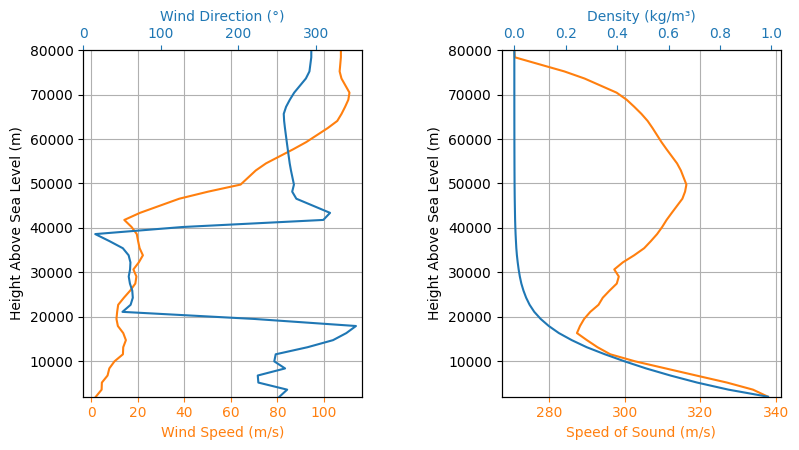

In [1]:
from rocketpy import Environment, SolidMotor, Rocket, Flight
import datetime

# Launch site
# FAR
# Latitude: 35.3466 N
# Longitude: -117.809 W
# Altitude: 2000 ft

site_lat = 35.3466
site_lon = -117.809 
site_alt = 2000 #ft

launch_date = [2026,1,18,8,0,0]
timeadj = -4

env = Environment(latitude=site_lat, longitude=site_lon, elevation=site_alt,date=(2026, 1, 18, 8), # year, month, day, hour
timezone="US/Pacific")

env.set_atmospheric_model(type="Forecast", file="GFS")

env.info()


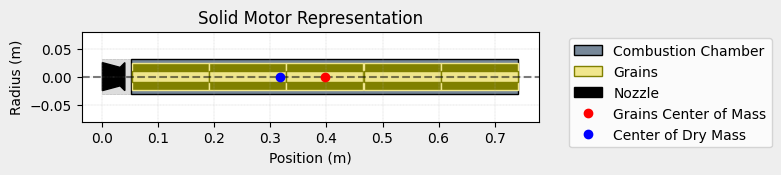

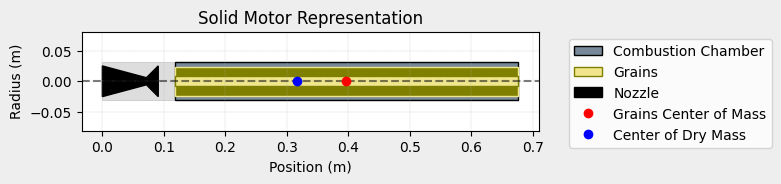

Nozzle Details
Nozzle Radius: 0.025 m
Nozzle Throat Radius: 0.00577 m

Grain Details
Number of Grains: 1
Grain Spacing: 0.001 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.0238 m
Grain Inner Radius: 0.008 m
Grain Height: 0.558 m
Grain Volume: 0.001 m3
Grain Mass: 1.599 kg

Motor Details
Total Burning Time: 3.06 s
Total Propellant Mass: 1.599 kg
Structural Mass Ratio: 0.000
Average Propellant Exhaust Velocity: 2076.139 m/s
Average Thrust: 1084.626 N
Maximum Thrust: 1604.3506 N at 2.56 s after ignition.
Total Impulse: 3318.955 Ns



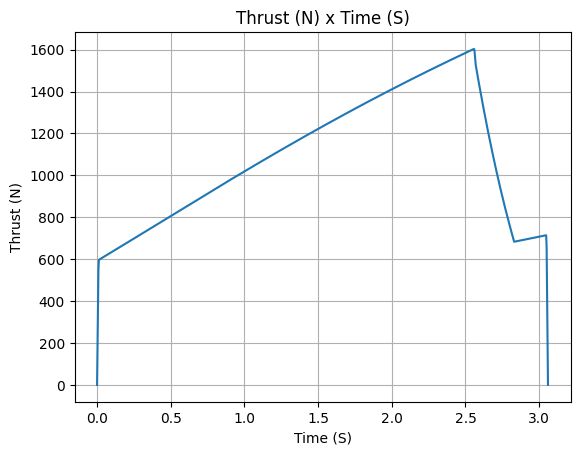

In [2]:

BoosterMotor = SolidMotor(
thrust_source="./L1553chasebismuth.eng",
dry_mass=0, #kg
dry_inertia=(0.125, 0.125, 0.002), #moi ,kg/m^2
nozzle_radius=25 / 1000, #m
grain_number=5, #m
grain_density=1815, #kg/m^3
grain_outer_radius=23.81 / 1000, #m
grain_initial_inner_radius= 10.16 / 1000, #m
grain_initial_height=137 / 1000, #m
grain_separation=1 / 1000, #m 
grains_center_of_mass_position=0.397, #m
center_of_dry_mass_position=0.317, #m
nozzle_position=0, #m
#burn_time=2.1, #s
throat_radius=16.5 / 1000,#m
coordinate_system_orientation="nozzle_to_combustion_chamber"
)
BoosterMotor.draw()
#BoosterMotor.info()

SustainerMotor = SolidMotor(
thrust_source="./L1081SomeKindaPropellent.eng",
dry_mass=0, #kg
dry_inertia=(0.125, 0.125, 0.002), #moi ,kg/m^2
nozzle_radius=25 / 1000, #m
grain_number=1, #m
grain_density=1815, #kg/m^3
grain_outer_radius=23.8 / 1000, #m
grain_initial_inner_radius= 8 / 1000, #m
grain_initial_height=558 / 1000, #m
grain_separation=1 / 1000, #m 
grains_center_of_mass_position=0.397, #m
center_of_dry_mass_position=0.317, #m
nozzle_position=0, #m
#burn_time=3.5, #s
throat_radius=5.77 / 1000,#m
coordinate_system_orientation="nozzle_to_combustion_chamber",

)
SustainerMotor.draw()
SustainerMotor.info()
#SustainerMotor.info()


0.2917155456
0.0182322216


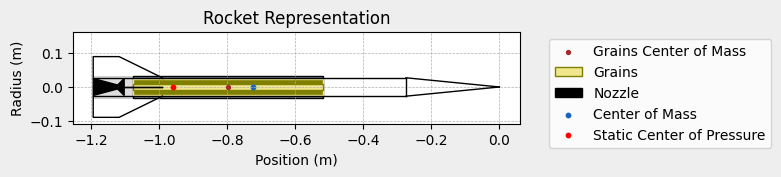

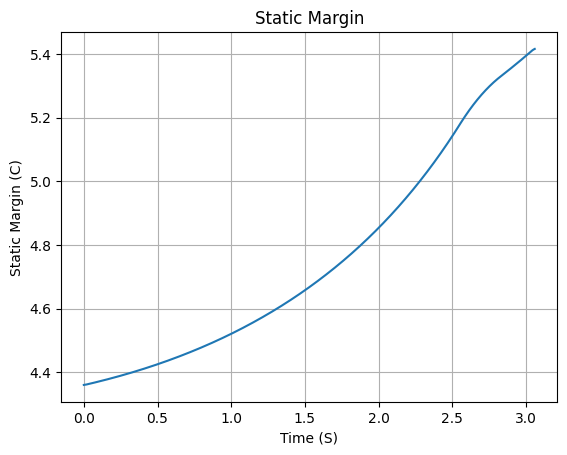

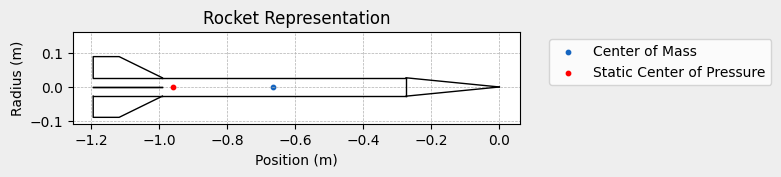

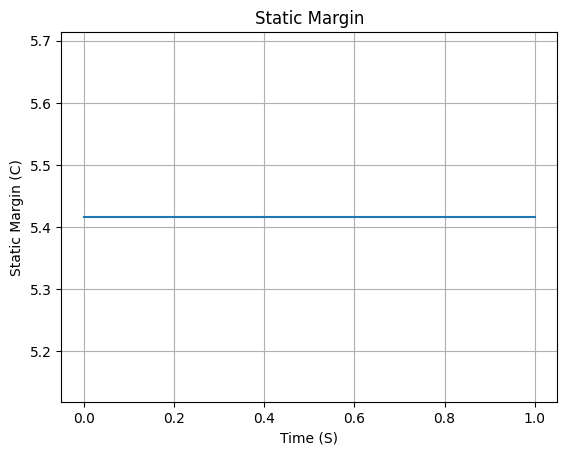

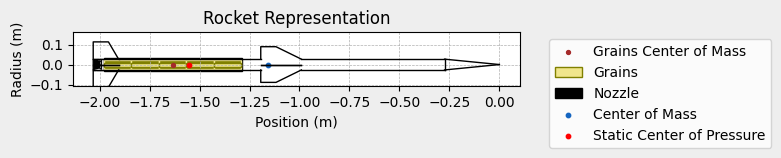

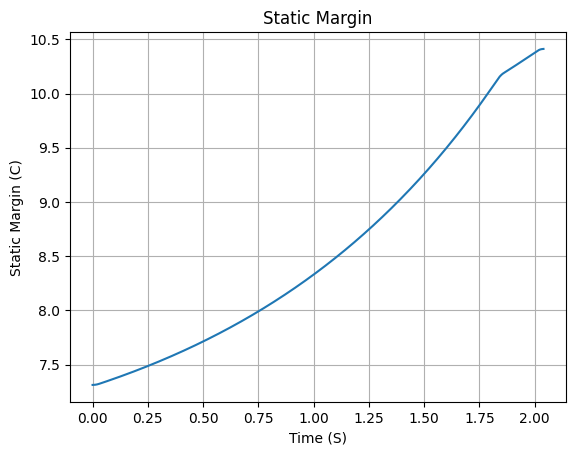

In [3]:
RelapseSustainer = Rocket(
    radius=54 / 2000,
    mass=2.05,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="./CD Power OFF Sustainer Only.csv",
    power_on_drag="./CD Power ON Sustainer only.csv",
    center_of_mass_without_motor=-0.66675,
    coordinate_system_orientation="tail_to_nose"
    )
RelapseSustainer.add_motor(SustainerMotor, position=-1.1938)

sustainernose_cone = RelapseSustainer.add_nose(
    length=0.27432, kind="conical", position=0
)

sustainerfin_set = RelapseSustainer.add_trapezoidal_fins(
    n=4,
    root_chord=0.2032,
    tip_chord=0.0762,
    span=0.06223,
    position=-0.9906,
    cant_angle=0.05,
    #airfoil=("../data/airfoils/NACA0012-radians.txt","radians"),
)


cd = 1.8
diameter = 0.6096

area = (diameter/2)*(diameter/2)*3.14
print(area)

main = RelapseSustainer.add_parachute(
    name="main",
    cd_s=area*cd,
    trigger=800,      # ejection altitude in meters
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
    radius=1.5,
    height=1.5,
    porosity=0.0432,
)

cd = 0.7
diameter = 0.1524

area = (diameter/2)*(diameter/2)*3.14
print(area)

drogue = RelapseSustainer.add_parachute(
    name="drogue",
    cd_s=area,
    trigger="apogee",  # ejection at apogee
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
    radius=1.5,
    height=1.5,
    porosity=0.0432,
)

RelapseSustainer.draw()
RelapseSustainer.plots.static_margin()
#RelapseSustainer.all_info()

#------------------------------------------------

RelapseSustainerNOMOTOR = Rocket(
    radius=54 / 2000,
    mass=3.6,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="./CD Power OFF Sustainer Only.csv",
    power_on_drag="./CD Power ON Sustainer only.csv",
    center_of_mass_without_motor=-0.66675,
    coordinate_system_orientation="tail_to_nose"
)

sustainernomotornose_cone = RelapseSustainerNOMOTOR.add_nose(
    length=0.27432, kind="conical", position=0
)

sustainernomotorfinset = RelapseSustainerNOMOTOR.add_trapezoidal_fins(
    n=4,
    root_chord=0.2032,
    tip_chord=0.0762,
    span=0.06223,
    position=-0.9906,
    cant_angle=0.05,
    #airfoil=("../data/airfoils/NACA0012-radians.txt","radians"),
)




RelapseSustainerNOMOTOR.draw()
RelapseSustainerNOMOTOR.plots.static_margin()
#RelapseSustainer.all_info()

#--------------------------------------

RelapseStack = Rocket(
    radius=54 / 2000,
    mass=5.162,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="./FULL STACK CD Power OFF.csv",
    power_on_drag="./FULL STACK CD Power ON.csv",
    center_of_mass_without_motor=-0.9906,
    coordinate_system_orientation="tail_to_nose"
    )
RelapseStack.add_motor(BoosterMotor, position=-2.032)

stacknose_cone = RelapseStack.add_nose(
    length=0.27432, kind="conical", position=0
)

sustainerstackfin_set = RelapseStack.add_trapezoidal_fins(
    n=4,
    root_chord=0.2032,
    tip_chord=0.0762,
    span=0.06223,
    position=-0.9906,
    cant_angle=0.05,
    #airfoil=("../data/airfoils/NACA0012-radians.txt","radians"),
)

boosterfin_set = RelapseStack.add_trapezoidal_fins(
    n=4,
    root_chord=0.127,
    tip_chord=0.0762,
    span=0.08636,
    position=-1.905,
    cant_angle=0.05,
    #airfoil=("../data/airfoils/NACA0012-radians.txt","radians"),
)

RelapseStack.draw()
RelapseStack.plots.static_margin()
#RelapseStack.all_info()

In [ ]:
from rocketpy.plots.compare import CompareFlights
import numpy as np
import matplotlib as mpl
import multiprocessing

#monte carlo attempts
#just gonna vary launch angle for now

railinclination = [88,1.5]
railheading = [270,90]
flightnum = 20
thisflightnum = 0

flights = []
landingcoords = []

randomnum = np.random.normal(railinclination[0],railinclination[1],1)
print(randomnum)

def runsim(val):
    print("running sim")
    StackFlight2 = Flight(
        rocket=RelapseStack, 
        environment=env, 
        rail_length=3.048, 
        inclination=np.random.normal(railinclination[0],railinclination[1],1)[0],#np.random.normal(railinclination,inclinationstd,1), 
        heading=np.random.normal(railheading[0],railheading[1],1)[0],
        max_time = BoosterMotor.burn_out_time
        )

    #StackFlight2.info()
    #StackFlight2.plots.trajectory_3d()
    flights.append(StackFlight2)

    stagingdelay = 8

    SustainerNOMOTORFlight2 = Flight(
        rocket=RelapseSustainerNOMOTOR, 
        environment=env, 
        initial_solution=StackFlight2,
        rail_length=0.01, 
        inclination=StackFlight2.attitude_angle(BoosterMotor.burn_out_time-0.01), 
        heading=StackFlight2.path_angle(BoosterMotor.burn_out_time-0.01),
        max_time = stagingdelay+BoosterMotor.burn_out_time
    )

    flights.append(SustainerNOMOTORFlight2)

    sustainerstartcondition = SustainerNOMOTORFlight2.solution[-2][:]
    sustainerstartcondition[0] = 0

    SustainerFlight2 = Flight(
        rocket=RelapseSustainer, 
        environment=env, 
        initial_solution=sustainerstartcondition,
        rail_length=0.01, 
        inclination=SustainerNOMOTORFlight2.attitude_angle(stagingdelay+BoosterMotor.burn_out_time-0.01), 
        heading=SustainerNOMOTORFlight2.path_angle(stagingdelay+BoosterMotor.burn_out_time-0.01),
        #max_time = 15
    )
    for entry in SustainerFlight2.solution:
        entry[0] = entry[0]+stagingdelay+BoosterMotor.burn_out_time

    flights.append(SustainerFlight2)
    landingcoords.append([SustainerFlight2.x_impact,SustainerFlight2.y_impact])
    print("ran sim")
    

    

while thisflightnum < flightnum:
    runsim()
    thisflightnum = thisflightnum + 1 
    print(thisflightnum)
    


print(landingcoords)
comparison = CompareFlights(flights)
# #SustainerFlight2.info()
# comparison.trajectories_3d()
# comparison.trajectories_2d()



[89.41737602]
Done!
[]
